# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.

 ### 1. Is the distribution of body temperatures normal?

In [3]:
# Importing necessary modules
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#Giving a nicer look by using the seaborn style.
sns.set()

#Generating values for the ECDF (graphing original data)
ecdf_x=np.sort(df["temperature"])
ecdf_y=np.arange(1, len(ecdf_x)+1)/len(ecdf_x)


After importing the necessary modules I generated Numpy arrays to be able to plot the Empirical CDF (CDF of the original data) for the purpose of comparing the validity of a normal distribution as a model for the data. X axis values (*ecdf_x*) are simply an ancending list of temperature values. This sorting is necessary as otherwise the graph wouldn't make sense. The Y values (*ecdf_y*) are normalised incremental 'probability values' to simulate the increments on the CDF graph.

In [4]:
#Plotting the ECDF with an appropriate label and labelling the axes.
plt.plot(ecdf_x, ecdf_y, marker=".", linestyle="none", color="blue", label="Empirical CDF")
plt.xlabel("Temperature")
plt.ylabel("ECDF")

#Generating a sorted array of normally distributed values and the accompanying y axis values.
normal_samples=np.sort(np.random.normal(np.mean(df["temperature"]),np.std(df["temperature"]) , size=10000))
cdf_y=np.arange(1, len(normal_samples)+1)/len(normal_samples)

The arrays are plotted and the graph is labelled as "Empirical CDF". I've chosen to plot dots and not the standard option for lines due to the moderately small amount of data. It wouldn't make sense to draw lines between distinct data points as no data is present there. The axes are labelled appropriately. 

To check the validity of approximating the actual data as 'normally distributed' I generated a numpy array *normal_samples* (an analogue of *ecdf_x*) which is a sorted array of values that would be obtained by a normal distribution with a mean and standard deviation corresponding to the sample mean and sample standard deviation respectively. The mean is an appropriate optimal parameter (as opposed to median) due to the small spread in data (small standard deviation of 0.7). The size of *normal_samples* is large to generate a smooth curve and reduce variability of the Theoretical CDF generated during each run. The size of 10,000 is arbibrary, but a nice tradeoff between an array too large that takes up alot of memory and one too small that varies alot from run to run. *cdf_y* is the Y axis analogue of *ecdf_y* for the simulated dataset.

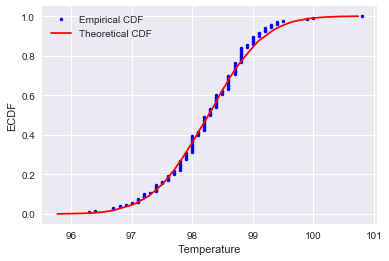

In [5]:
#Plotting the Theoretical CDF of the normally distributed data on top of the ECDF.
plt.plot(normal_samples, cdf_y, color="red", label="Theoretical CDF")
plt.legend(loc="upper left")

#Showing the Empirical and Theoretical CDFs on one graph.
plt.show()

The Theoretical CDF is plotted, the legend is added and the graph is shown. From the graph we can see that there is good agreement between the Empirical CDF and the Theoretical CDF (of a Normal Distribution) leading to the conclusion that the sample data is modelled well by a Normal Distribution with mean and standard deviation of the distribution corresponding to the sample mean and standard deviation respectively (as mentioned above). So the answer is yes, **the distribution of body temperatures is normal**.

### 2. Is the sample size large? Are the observations independent?

**The original observations are independant** as, by definition, each observation (each row) does not provide any information about any other observation. However, the *"Data were constructed to match as closely as possible the histograms and summary statistics presented in that article."* hence this dataset is not a random sample since it was chosen to be representative of the articles' findings (as expressed in the quote). Though this poses no problem for the validity of this data as a condition of CLT or else. 

It's hard to answer the question about the size of the sample. If a sample size is considered large if it represents a noticeable proportion of the entire population then no, this sample is not large as the population size is obviously much much greater. If we consider the statistical n>30 benchmark for a large sample size then indeed this sample is large. Given that this exercise exists and we will proceed with it, the question seems rhetorical (the answer being yes to both questions) so I will conclude that **the sample size is large**, but with no convincing justification for why.

### 3. Is the true population mean really 98.6 degrees F?

* Would you use a one-sample or two-sample test? Why?
     * There is only one sample present so a two-sample test is not possible (as it requires 2 samples from distinct populations), **hence a one-sample test**.
* In this situation, is it appropriate to use the  t  or  z  statistic?
     * Z test is used when the sample size is > 30 and the population standard deviation is known. T test is used when the sample size is < 30 or the population standard deviation is unknown. Given that the population standard deviation is unknown (even though the sample size is > 30), **the t statistic will be used**.

The Null Hypotheses is posed as follows: *The true population mean is 98.6 degrees F (μ=98.6).* The t statistic is defined in the usual manner of the t score.

In [6]:
#Calculating sample mean and standard deviation. Setting the proposed population mean.
sample_mean=np.mean(df["temperature"])
sample_std=np.std(df["temperature"])
proposed_mean=98.6
#Observed t value calculated.
actual_t_value=(proposed_mean - sample_mean)/(sample_std / np.sqrt(len(df["temperature"])))

The sample mean and standard deviation of the original sample are calculated as *sample_mean* and *sample_std* respectively, the proposed population mean is stored as *proposed_mean* and the observed t value is calculated and stored as *actual_t_value*.

In [7]:
#Initializing an array to hold the t values generated from bootstrap samples (the bootstrap replicates)
t_values=np.empty(10000)

#Looping 10,000 times
for i in range(10000):
   # to generate bootstrap replicates and store them in the array.
   simulated_sample=np.random.choice(df["temperature"], len(df["temperature"]))
   simulated_mean=np.mean(simulated_sample)
   simulated_std=np.std(simulated_sample)
   t_values[i]=(proposed_mean - simulated_mean)/(simulated_std / np.sqrt(len(simulated_sample)))

#Calculating the p value   
p_value=np.sum(t_values > actual_t_value)/len(t_values)

An empty numpy array *t_values* is initialized to hold 10,000 t values (we are going to generate 10,000 bootstrap replicates). We loop 10,000 times to generate 10,000 t values. First we simulate a resampling of the sample by choosing values without replacement from the *temperature* column. This sample (the bootstrap sample) is of the same length as the original sample. We calculate the mean and std of this new sample (*simulated_mean*, *simulated_std*) and after calculating the bootstrap replicate (the t value) we add it to our *t_values* array. The p value is defined as the proportion of t values calculated under the null hypothesis that are at least as extreme as the observed t value.

A large p value would indicate that our observed t value is a very probable outcome given the null hypothesis and hence the null hypothesis is most likely true. A very small p value would indicate that there are a very few possible outcomes (t values) that are as extreme or more extreme than the actual outcome (*actual_t_value*) that we observed and hence is most likely false. 



Actual t value: 5.475925, p value: 0.509000


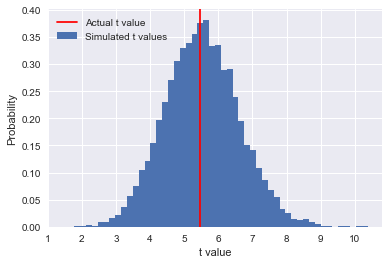

In [8]:
print("Actual t value: %f, p value: %f" % (actual_t_value, p_value)) # Printing some key values,
plt.hist(t_values, bins=50, normed=True, label="Simulated t values") # plotting the sampling distribution,
plt.xlabel("t value") # with appropriate labels
plt.ylabel("Probability")
plt.xticks([x for x in range(1,11)]) # and more detailed x ticks.
plt.axvline(x=actual_t_value, color="red", label="Actual t value") # Adding a vertical line to show the actual t value.
plt.legend(loc="upper left")
plt.show()

I printed the p value and the observed t value for reference and plotted the distribution of t values as a histogram. I chose a histogram because there were too many data points to use a swarm plot and given the moderately small spread in data, the histogram highlights the important features (range and distribution of simulated t values). I also added a vertical line to show the observed t value (*actual_t_value*) to illustrate graphically that the p value is very large.

Given that the p value is very large we conclude that the null hypothesis is true, **true population mean is indeed 98.6F**.

* Now try using the other test. How is the result be different? Why?
    * To do the Z test we again note down the null hypothesis as before (*The true population mean is 98.6F*) and proceed with the test as if the null hypothesis is true (which means that we can say that we 'know' the population mean, μ, to be 98.6). The Z score formula is Z=(x-μ)/σ. Where μ is the population mean, σ is the population standard deviation and x is the sample mean. However, since don't know σ we approximate it by the sample standard deviation (commanly denoted as *s*) and given that we will be comparing a sample mean to the population mean via the Z score the formula becomes Z=(x-μ)/(s/√n) where n is the sample size (130 in this case). Z scores are used on normal distributions and the T test uses the t distribution which tends towards the normal distribution at the limit n->∞  although for n>30 the t distribution is approximately normal. This means in this case where n>30 (n=130) and the population standard deviation is aproximated, both the Z test and T test are performed on the normal distribution and the formula of the Z score is exactly that of the T score. **In conclusion both tests produce identical results.**

### 4. Draw a small sample of size 10 from the data and repeat both tests.
* Which one is the correct one to use? 
    * **t test**, as sample size is < 30 and the population standard deviation is not known

Actual t value: 5.475925, p value (for sample of 10): 0.006300



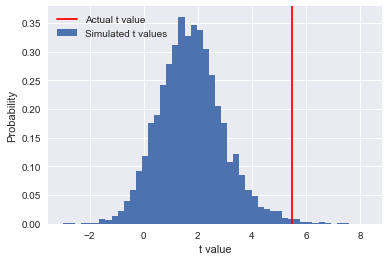

In [9]:
t_values_10_sample=np.empty(10000)

for i in range(10000):
   # to generate bootstrap replicates and store them in the array
   simulated_sample=np.random.choice(df["temperature"], 10)
   simulated_mean=np.mean(simulated_sample)
   simulated_std=np.std(simulated_sample)
   t_values_10_sample[i]=(proposed_mean - simulated_mean)/(simulated_std / np.sqrt(len(simulated_sample)))

p_value_10_sample=np.sum(t_values_10_sample>actual_t_value)/len(t_values_10_sample)

print("Actual t value: %f, p value (for sample of 10): %f\n" % (actual_t_value, p_value_10_sample))
plt.hist(t_values_10_sample, bins=50, normed=True, label="Simulated t values")
plt.xlabel("t value")
plt.ylabel("Probability")
plt.axvline(x=actual_t_value, color="red", label="Actual t value")
plt.legend(loc="upper left")
plt.show()

The above code is the T test for a sample size of 10. I have not included comments as the process is identical other than the sample size and the null hypothesis is the same. This time we get a p value that is constantly less that 0.01 on each run, thus unless we choose a signifance level lower than 1% we would say that the observed t value is unlikely given the null hypothesis (that the real mean is 98.6F) and hence the **null hypothesis is false (the real mean is not 98.6F).**

The Z test cannot be performed as we don't know the population standard deviation and cannot approximate it using the sample standard deviation given that the sample size is 10 (the approximation is only valid for n>30)

* What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?
    * N/A